In [1]:
!pip install pandas
!pip3 install matplotlib
!pip install numpy
!pip install scipy
!pip install openpyxl
!pip install xlrd openpyxl




   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 653.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.5 MB 653.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.5 MB 726.2 kB/s eta 0:00:16
   ---------------------------------------- 0.1/11.5 MB 654.9 kB/s eta 0:00:18
    --------------------------------------- 0.2/11.5 MB 697.2 kB/s eta 0:00:17
    --------------------------------------- 0.2/11.5 MB 689.9 kB/s eta 0:00:17
    --------------------------------------- 0.2/11.5 MB 719.7 kB/s eta 0:00:16
    --------------------------------------- 0.3/11.5 MB 707.1 kB/s eta 0:00:16
   - -------------------------------------- 0.3/11.5 MB 701.4 kB/s eta 0:00:16
   - -------------------------------------- 0.4/11.5 MB 742.3 kB/s eta 0:00:16
   - -------------------------------------- 0.4/11.5 MB 734.3 kB/s eta

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from penguin_utility import *

pd.set_option("display.max_rows", 5)

In [3]:
%matplotlib notebook
%matplotlib inline

In [4]:
import pandas as pd

# Read the CSV file and create a DataFrame
count_data = pd.read_csv("count_penguin.csv")

# Choose columns of interest
penguin_counts = pd.DataFrame(count_data, columns=['site_name', 'common_name', 'year', 'penguin_count', 'count_type'])

# Create another column giving the number of years since 1985
penguin_counts['years after 1985'] = penguin_counts['year'] - 1985



In [5]:
penguin_counts

,site_name,common_name,year,penguin_count,count_type,years after 1985
0,Neko Harbor (Andvord Bay),gentoo penguin,1987,397,chicks,2
1,Neko Harbor (Andvord Bay),gentoo penguin,1996,934,chicks,11
...,...,...,...,...,...,...
226,Petermann Island,gentoo penguin,2020,3498,nests,35
227,Petermann Island,gentoo penguin,2020,4960,chicks,35


In [20]:
adelie_counts = penguin_counts.loc[(penguin_counts['common_name']=='adelie penguin') & (penguin_counts['count_type']=='nests') & (penguin_counts['site_name'] == 'Petermann Island'), ['site_name', 'common_name','years after 1985', 'penguin_count', 'count_type']]
gentoo_counts = penguin_counts.loc[(penguin_counts['common_name']=='gentoo penguin') & (penguin_counts['count_type']=='nests') & (penguin_counts['site_name']== 'Neko Harbor (Andvord Bay)'), ['site_name', 'common_name','years after 1985', 'penguin_count', 'count_type']]
chinstrap_counts = penguin_counts.loc[(penguin_counts['common_name']=='chinstrap penguin') & (penguin_counts['count_type']=='nests') & (penguin_counts['penguin_count'] > 1) & (penguin_counts['site_name']=='Orne Islands'), ['site_name', 'common_name','years after 1985', 'penguin_count', 'count_type']]


# gentoo_chinstrap_counts = penguin_counts.loc[(penguin_counts['common_name']=='gentoo penguin' or penguin_counts['common_name']=='chinstrap penguin') & (penguin_counts['count_type']=='nests') & (penguin_counts['site_name']== 'Neko Harbor (Andvord Bay)' or penguin_counts['site_name']=='Orne Islands'), ['site_name', 'common_name','years after 1985', 'penguin_count', 'count_type']]

gentoo_chinstrap_merged_counts = pd.concat([gentoo_counts, chinstrap_counts])

In [7]:
#Write your code here
chinstrap_counts

,site_name,common_name,years after 1985,penguin_count,count_type
71,Orne Islands,chinstrap penguin,-1,340,nests
72,Orne Islands,chinstrap penguin,2,860,nests
...,...,...,...,...,...
104,Orne Islands,chinstrap penguin,30,353,nests
105,Orne Islands,chinstrap penguin,31,298,nests


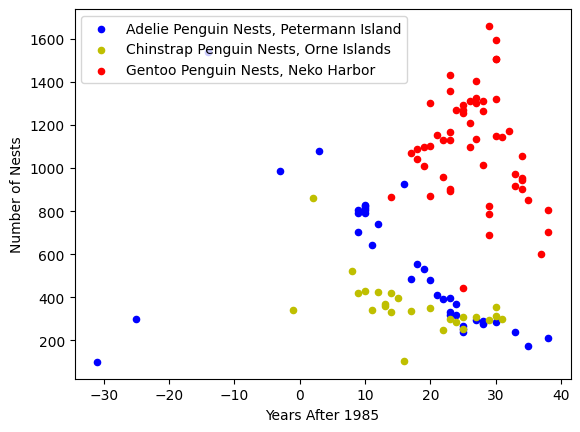

In [8]:
ax1= adelie_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label = 'Adelie Penguin Nests, Petermann Island', color='b')
chinstrap_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label='Chinstrap Penguin Nests, Orne Islands', color = 'y', ax=ax1)
gentoo_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label= 'Gentoo Penguin Nests, Neko Harbor', color='r', ax=ax1)
ax1.set_xlabel("Years After 1985")
ax1.set_ylabel("Number of Nests")
plt.show()


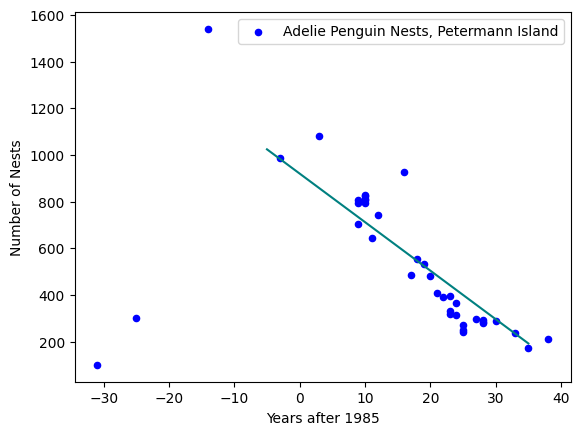

In [9]:
adelie_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label = 'Adelie Penguin Nests, Petermann Island', color='b')
x = np.linspace(-5, 35, 100)

#Replace m and b in the line of code below
y = -20.8*x +920


plt.plot(x, y, color='teal')
plt.xlabel('Years after 1985')
plt.ylabel('Number of Nests')
plt.show()

In [10]:
chinstrap_counts

,site_name,common_name,years after 1985,penguin_count,count_type
71,Orne Islands,chinstrap penguin,-1,340,nests
72,Orne Islands,chinstrap penguin,2,860,nests
...,...,...,...,...,...
104,Orne Islands,chinstrap penguin,30,353,nests
105,Orne Islands,chinstrap penguin,31,298,nests


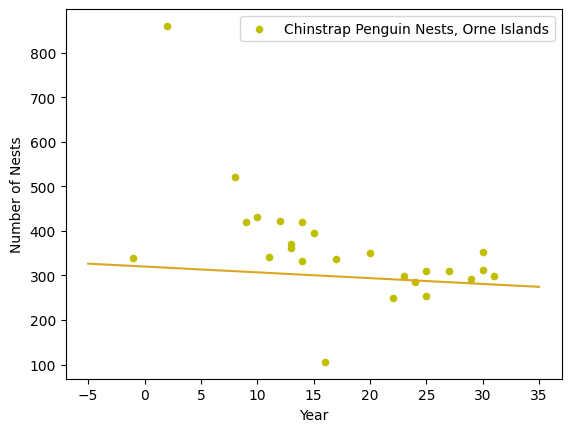

In [11]:
chinstrap_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label = 'Chinstrap Penguin Nests, Orne Islands', color='y')
x = np.linspace(-5, 35, 100)


#Replace m and b with the values you calculated
y = -1.3*x + 320

plt.plot(x, y, color='goldenrod')
plt.xlabel('Year')
plt.ylabel('Number of Nests')
plt.show()

In [12]:
gentoo_counts

,site_name,common_name,years after 1985,penguin_count,count_type
4,Neko Harbor (Andvord Bay),gentoo penguin,14,864,nests
5,Neko Harbor (Andvord Bay),gentoo penguin,18,1042,nests
...,...,...,...,...,...
67,Neko Harbor (Andvord Bay),gentoo penguin,38,806,nests
68,Neko Harbor (Andvord Bay),gentoo penguin,38,705,nests


poly1d([  -7.05486569, 1290.83447135])

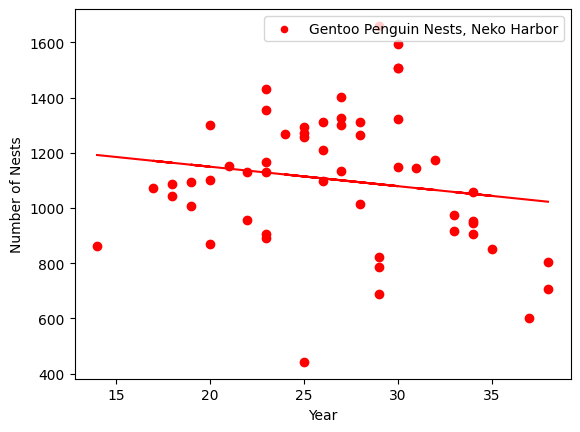

In [32]:
gentoo_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label = 'Gentoo Penguin Nests, Neko Harbor', color='r')

plt.xlabel('Year')
plt.ylabel('Number of Nests')
# plt.show()

x = gentoo_counts['years after 1985']
y = gentoo_counts['penguin_count']

plt.scatter(x, y, color='red', label='Data')

coefficients = np.polyfit(x, y, 1)
poly_function = np.poly1d(coefficients)
y_pred = poly_function(x)

plt.plot(x, y_pred, 'red')

poly_function


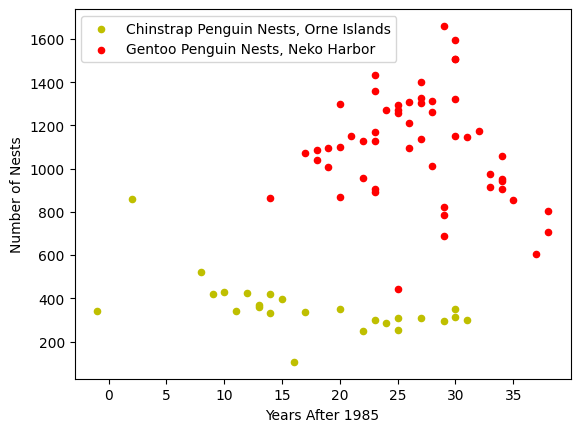

In [34]:
ax1 = chinstrap_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label='Chinstrap Penguin Nests, Orne Islands', color = 'y')
gentoo_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label= 'Gentoo Penguin Nests, Neko Harbor', color='r', ax=ax1)
ax1.set_xlabel("Years After 1985")
ax1.set_ylabel("Number of Nests")

plt.show()


In [35]:
gentoo_chinstrap_merged_counts

,site_name,common_name,years after 1985,penguin_count,count_type
4,Neko Harbor (Andvord Bay),gentoo penguin,14,864,nests
5,Neko Harbor (Andvord Bay),gentoo penguin,18,1042,nests
...,...,...,...,...,...
104,Orne Islands,chinstrap penguin,30,353,nests
105,Orne Islands,chinstrap penguin,31,298,nests


poly1d([ 17.78194523, 444.07522735])

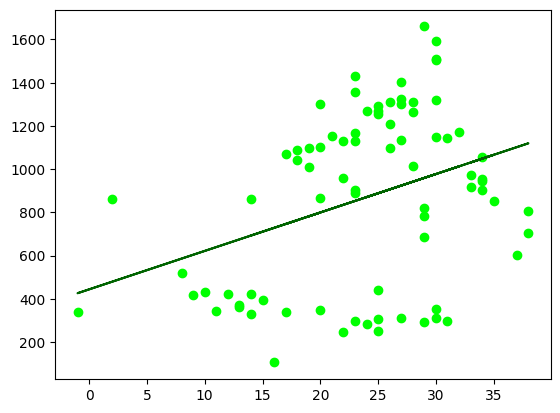

In [37]:
x = gentoo_chinstrap_merged_counts['years after 1985']
y = gentoo_chinstrap_merged_counts['penguin_count']

plt.scatter(x, y, color='lime', label='Data')

coefficients = np.polyfit(x, y, 1)
poly_function = np.poly1d(coefficients)
y_pred = poly_function(x)

plt.plot(x, y_pred, 'darkgreen')

poly_function


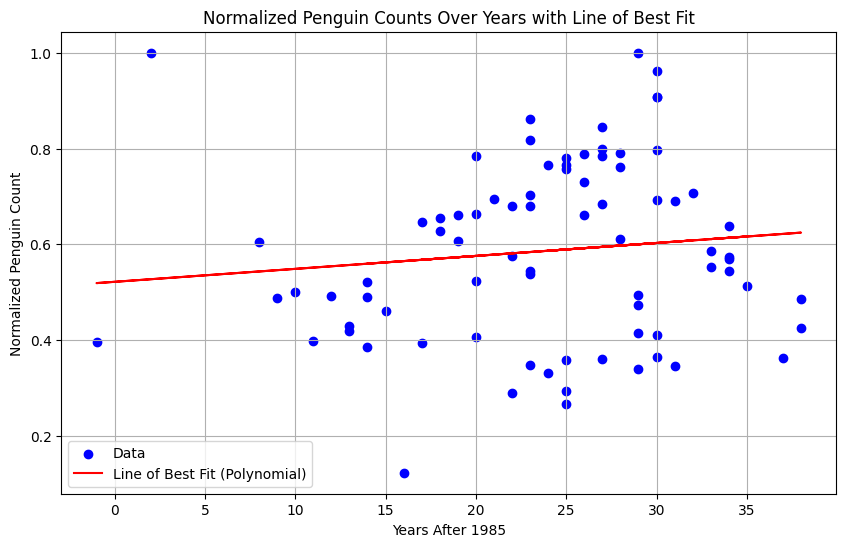

poly1d([0.00270279, 0.52176391])

In [39]:
# Normalising

# Normalize the penguin counts for gentoo and chinstrap penguins separately
gentoo_counts_normalized = gentoo_chinstrap_merged_counts[gentoo_chinstrap_merged_counts['common_name'] == 'gentoo penguin']['penguin_count'] / gentoo_chinstrap_merged_counts[gentoo_chinstrap_merged_counts['common_name'] == 'gentoo penguin']['penguin_count'].max()
chinstrap_counts_normalized = gentoo_chinstrap_merged_counts[gentoo_chinstrap_merged_counts['common_name'] == 'chinstrap penguin']['penguin_count'] / gentoo_chinstrap_merged_counts[gentoo_chinstrap_merged_counts['common_name'] == 'chinstrap penguin']['penguin_count'].max()

# Combine the normalized counts back into a single DataFrame
normalized_counts = pd.concat([gentoo_counts_normalized, chinstrap_counts_normalized])

# Extracting the variables for polynomial fitting
x = gentoo_chinstrap_merged_counts['years after 1985']
y = normalized_counts

# Fitting the polynomial curve
degree = 1  # Degree of the polynomial (1 for linear)
coefficients = np.polyfit(x, y, degree)

# Creating the polynomial function
poly_function = np.poly1d(coefficients)

# Generating y-values for the polynomial curve
y_pred = poly_function(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Line of Best Fit (Polynomial)')
plt.xlabel('Years After 1985')
plt.ylabel('Normalized Penguin Count')
plt.title('Normalized Penguin Counts Over Years with Line of Best Fit')
plt.legend()
plt.grid(True)
plt.show()

poly_function